## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [93]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

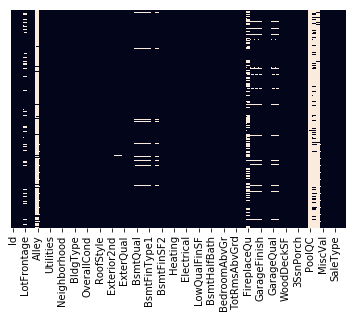

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

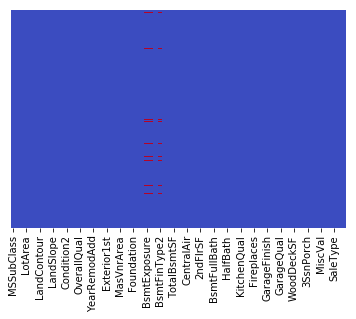

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

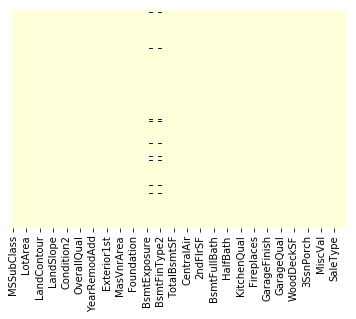

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
##HAndle Categorical Features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [30]:
main_df=df.copy()

In [32]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [33]:
test_df.shape

(1459, 74)

In [34]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [35]:
final_df=pd.concat([df,test_df],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [36]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [37]:
final_df.shape

(2881, 75)

In [38]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [39]:
final_df.shape

(2881, 235)

In [40]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [41]:
final_df.shape

(2881, 175)

In [42]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,0,0,1,1,0,0,0,0,0,0
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,0,0,1,1,0,0,0,0,1,0
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,1,1,0,0,0,0,1,0
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,1,0,0,0,0,0,0,1,0,0
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [44]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [47]:
df_Train.shape, df_Test.shape

((1422, 175), (1459, 175))

In [48]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [51]:
# import xgboost
# classifier=xgboost.XGBRegressor()

In [52]:
import xgboost
regressor=xgboost.XGBRegressor()

In [53]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [54]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [60]:
# random_cv.fit(X_train,y_train)

In [61]:
# random_cv.best_estimator_

In [62]:
# random_cv.best_estimator_

In [65]:
X_train.shape, y_train.shape

((1422, 174), (1422,))

In [63]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [64]:
regressor.fit(X_train,y_train)

[04:12:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, monotone_constraints='()',
       n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [68]:
# df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [69]:
df_Test.shape

(1459, 174)

In [70]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [83]:
y_pred = regressor.predict(df_Test)
y_pred.shape

(1459,)

In [87]:
def create_submission_file( predict_val, filename = "test"):
    submission_df = pd.read_csv("sample_submission.csv")
    print(submission_df.shape)
    
    submission_df["SalePrice"] = y_pred
    submission_df.to_csv(filename + '.csv',index=False)
    
    return "Successful file created : " + filename
    

In [88]:
create_submission_file( y_pred, filename = "first")

(1459, 2)


'Successful file created : first'

## Step2

## Artificial Neural Network Implementation

In [90]:
from sklearn.metrics import mean_squared_error

In [110]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import backend
from keras import backend as K


# from keras.losses import mean_squared_error
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [109]:
# def root_mean_squared_error(y_true, y_pred):
#     return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

#both are right root_mean_squared_error


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [116]:
def model_build_dl_1(X_train_val, y_train_val):
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

    # Adding the second hidden layer
    model.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

    # Adding the third hidden layer
    model.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
    # Adding the output layer
    model.add(Dense(output_dim = 1, init = 'he_uniform'))

    # Compiling the ANN
    model.compile(loss=root_mean_squared_error, optimizer='Adamax')


    # Fitting the ANN to the Training set
#     model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)
    model_history=model.fit(X_train_val, y_train_val,validation_split=0.20, batch_size = 10, nb_epoch = 100)
    
    return model
    

In [118]:
model_build_1 = model_build_dl_1(X_train.values, y_train.values)

Train on 1137 samples, validate on 285 samples
Epoch 1/100
1137/1137 [==============================] - 0s 168us/step - loss: 152279.1986 - val_loss: 77337.3219
Epoch 2/100
1137/1137 [==============================] - 0s 111us/step - loss: 71619.3165 - val_loss: 67171.5980
Epoch 3/100
1137/1137 [==============================] - 0s 116us/step - loss: 66478.7083 - val_loss: 63588.2307
Epoch 4/100
1137/1137 [==============================] - 0s 116us/step - loss: 62969.8080 - val_loss: 61043.7709
Epoch 5/100
1137/1137 [==============================] - 0s 124us/step - loss: 59286.8699 - val_loss: 58552.3455
Epoch 6/100
1137/1137 [==============================] - 0s 133us/step - loss: 55781.3010 - val_loss: 56814.4242
Epoch 7/100
1137/1137 [==============================] - 0s 146us/step - loss: 53189.8198 - val_loss: 54812.3620
Epoch 8/100
1137/1137 [==============================] - 0s 139us/step - loss: 50283.1147 - val_loss: 52755.3247
Epoch 9/100
1137/1137 [=========================

1137/1137 [==============================] - 0s 115us/step - loss: 33594.8065 - val_loss: 45719.5998
Epoch 73/100
1137/1137 [==============================] - 0s 106us/step - loss: 33230.4960 - val_loss: 44848.5401
Epoch 74/100
1137/1137 [==============================] - 0s 115us/step - loss: 33566.1026 - val_loss: 44150.2931
Epoch 75/100
1137/1137 [==============================] - 0s 125us/step - loss: 33185.7390 - val_loss: 44130.9541
Epoch 76/100
1137/1137 [==============================] - 0s 166us/step - loss: 33306.4425 - val_loss: 44173.9915
Epoch 77/100
1137/1137 [==============================] - 0s 143us/step - loss: 33236.3809 - val_loss: 43982.1238
Epoch 78/100
1137/1137 [==============================] - 0s 119us/step - loss: 32954.2558 - val_loss: 44232.0163
Epoch 79/100
1137/1137 [==============================] - 0s 115us/step - loss: 32745.1445 - val_loss: 45848.8608
Epoch 80/100
1137/1137 [==============================] - 0s 103us/step - loss: 33122.7468 - val_loss

In [107]:
y_pred_1 = model_build_1.predict(df_Test)

In [108]:
create_submission_file( y_pred_1, filename = "forth_DL")

(1459, 2)


'Successful file created : forth_DL'

In [148]:
def model_build_dl_2(X_train_val, y_train_val):
    # Fitting the ANN to the Training set

    model = Sequential()
    model.add(Dense(128, input_shape = (X_train.shape[1], ), activation = 'relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer='sgd', loss='mse')
    
#     model_history = model.fit(X_train_val, y_train_val, epochs=200, batch_size=16, validation_split = 0.001, verbose=0)
    
    model_history_val = model.fit(X_train_val, y_train_val, epochs=1000, batch_size=16, validation_split = 0.001)
    
    
    #     model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)
    return model, model_history_val
    

In [149]:
model_build_2, model_history = model_build_dl_2(X_train.values, y_train.values)

Train on 1420 samples, validate on 2 samples
Epoch 1/1000
1420/1420 [==============================] - 0s 95us/step - loss: 39777073451.9887 - val_loss: 20977883136.0000
Epoch 2/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073688.5183 - val_loss: 20977883136.0000
Epoch 3/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073676.9803 - val_loss: 20977883136.0000
Epoch 4/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073255.8423 - val_loss: 20977883136.0000
Epoch 5/1000
1420/1420 [==============================] - 0s 71us/step - loss: 39777073457.7577 - val_loss: 20977883136.0000
Epoch 6/1000
1420/1420 [==============================] - 0s 72us/step - loss: 39777073180.8451 - val_loss: 20977883136.0000
Epoch 7/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073365.4535 - val_loss: 20977883136.0000
Epoch 8/1000
1420/1420 [==============================] - 0s 87us/step - loss: 3

Epoch 66/1000
1420/1420 [==============================] - 0s 88us/step - loss: 39777073457.7577 - val_loss: 20977883136.0000
Epoch 67/1000
1420/1420 [==============================] - 0s 98us/step - loss: 39777073463.5268 - val_loss: 20977883136.0000
Epoch 68/1000
1420/1420 [==============================] - 0s 74us/step - loss: 39777072990.4676 - val_loss: 20977883136.0000
Epoch 69/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073544.2930 - val_loss: 20977883136.0000
Epoch 70/1000
1420/1420 [==============================] - 0s 70us/step - loss: 39777073751.9775 - val_loss: 20977883136.0000
Epoch 71/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073203.9211 - val_loss: 20977883136.0000
Epoch 72/1000
1420/1420 [==============================] - 0s 66us/step - loss: 39777073446.2197 - val_loss: 20977883136.0000
Epoch 73/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073319.3014 - val_loss: 209778831

1420/1420 [==============================] - 0s 67us/step - loss: 39777073417.3746 - val_loss: 20977883136.0000
Epoch 131/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073342.3775 - val_loss: 20977883136.0000
Epoch 132/1000
1420/1420 [==============================] - 0s 61us/step - loss: 39777073613.5211 - val_loss: 20977883136.0000
Epoch 133/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073469.2958 - val_loss: 20977883136.0000
Epoch 134/1000
1420/1420 [==============================] - 0s 64us/step - loss: 39777073388.5296 - val_loss: 20977883136.0000
Epoch 135/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073342.3775 - val_loss: 20977883136.0000
Epoch 136/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073619.2901 - val_loss: 20977883136.0000
Epoch 137/1000
1420/1420 [==============================] - 0s 64us/step - loss: 39777073648.1352 - val_loss: 20977883136.0000

1420/1420 [==============================] - 0s 107us/step - loss: 39777073307.7634 - val_loss: 20977883136.0000
Epoch 195/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073457.7577 - val_loss: 20977883136.0000
Epoch 196/1000
1420/1420 [==============================] - 0s 85us/step - loss: 39777073423.1437 - val_loss: 20977883136.0000
Epoch 197/1000
1420/1420 [==============================] - 0s 103us/step - loss: 39777073538.5239 - val_loss: 20977883136.0000
Epoch 198/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073550.0620 - val_loss: 20977883136.0000
Epoch 199/1000
1420/1420 [==============================] - 0s 76us/step - loss: 39777073676.9803 - val_loss: 20977883136.0000
Epoch 200/1000
1420/1420 [==============================] - 0s 68us/step - loss: 39777072990.4676 - val_loss: 20977883136.0000
Epoch 201/1000
1420/1420 [==============================] - 0s 58us/step - loss: 39777073319.3014 - val_loss: 20977883136.00

1420/1420 [==============================] - 0s 86us/step - loss: 39777073590.4451 - val_loss: 20977883136.0000
Epoch 259/1000
1420/1420 [==============================] - 0s 80us/step - loss: 39777073423.1437 - val_loss: 20977883136.0000
Epoch 260/1000
1420/1420 [==============================] - 0s 81us/step - loss: 39777073053.9268 - val_loss: 20977883136.0000
Epoch 261/1000
1420/1420 [==============================] - 0s 86us/step - loss: 39777073578.9070 - val_loss: 20977883136.0000
Epoch 262/1000
1420/1420 [==============================] - 0s 79us/step - loss: 39777073348.1465 - val_loss: 20977883136.0000
Epoch 263/1000
1420/1420 [==============================] - 0s 79us/step - loss: 39777073803.8986 - val_loss: 20977883136.0000
Epoch 264/1000
1420/1420 [==============================] - 0s 72us/step - loss: 39777073584.6761 - val_loss: 20977883136.0000
Epoch 265/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073676.9803 - val_loss: 20977883136.0000

1420/1420 [==============================] - 0s 65us/step - loss: 39777073296.2253 - val_loss: 20977883136.0000
Epoch 323/1000
1420/1420 [==============================] - 0s 68us/step - loss: 39777073284.6873 - val_loss: 20977883136.0000
Epoch 324/1000
1420/1420 [==============================] - 0s 70us/step - loss: 39777073596.2141 - val_loss: 20977883136.0000
Epoch 325/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073538.5239 - val_loss: 20977883136.0000
Epoch 326/1000
1420/1420 [==============================] - 0s 78us/step - loss: 39777073515.4479 - val_loss: 20977883136.0000
Epoch 327/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073255.8423 - val_loss: 20977883136.0000
Epoch 328/1000
1420/1420 [==============================] - 0s 91us/step - loss: 39777073676.9803 - val_loss: 20977883136.0000
Epoch 329/1000
1420/1420 [==============================] - 0s 69us/step - loss: 39777073584.6761 - val_loss: 20977883136.0000

1420/1420 [==============================] - 0s 76us/step - loss: 39777073319.3014 - val_loss: 20977883136.0000
Epoch 387/1000
1420/1420 [==============================] - 0s 73us/step - loss: 39777073417.3746 - val_loss: 20977883136.0000
Epoch 388/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073538.5239 - val_loss: 20977883136.0000
Epoch 389/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073423.1437 - val_loss: 20977883136.0000
Epoch 390/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073313.5324 - val_loss: 20977883136.0000
Epoch 391/1000
1420/1420 [==============================] - 0s 61us/step - loss: 39777073532.7549 - val_loss: 20977883136.0000
Epoch 392/1000
1420/1420 [==============================] - 0s 71us/step - loss: 39777073273.1493 - val_loss: 20977883136.0000
Epoch 393/1000
1420/1420 [==============================] - 0s 100us/step - loss: 39777073411.6056 - val_loss: 20977883136.000

1420/1420 [==============================] - 0s 90us/step - loss: 39777073434.6817 - val_loss: 20977883136.0000
Epoch 451/1000
1420/1420 [==============================] - 0s 81us/step - loss: 39777073457.7577 - val_loss: 20977883136.0000
Epoch 452/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073492.3718 - val_loss: 20977883136.0000
Epoch 453/1000
1420/1420 [==============================] - 0s 70us/step - loss: 39777073815.4366 - val_loss: 20977883136.0000
Epoch 454/1000
1420/1420 [==============================] - 0s 72us/step - loss: 39777073134.6930 - val_loss: 20977883136.0000
Epoch 455/1000
1420/1420 [==============================] - 0s 72us/step - loss: 39777073330.8394 - val_loss: 20977883136.0000
Epoch 456/1000
1420/1420 [==============================] - 0s 70us/step - loss: 39777072996.2366 - val_loss: 20977883136.0000
Epoch 457/1000
1420/1420 [==============================] - 0s 69us/step - loss: 39777073636.5972 - val_loss: 20977883136.0000

1420/1420 [==============================] - 0s 79us/step - loss: 39777073503.9099 - val_loss: 20977883136.0000
Epoch 515/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073601.9831 - val_loss: 20977883136.0000
Epoch 516/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073601.9831 - val_loss: 20977883136.0000
Epoch 517/1000
1420/1420 [==============================] - 0s 76us/step - loss: 39777073475.0648 - val_loss: 20977883136.0000
Epoch 518/1000
1420/1420 [==============================] - 0s 75us/step - loss: 39777073423.1437 - val_loss: 20977883136.0000
Epoch 519/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073550.0620 - val_loss: 20977883136.0000
Epoch 520/1000
1420/1420 [==============================] - 0s 91us/step - loss: 39777073694.2873 - val_loss: 20977883136.0000
Epoch 521/1000
1420/1420 [==============================] - 0s 97us/step - loss: 39777073226.9972 - val_loss: 20977883136.0000

1420/1420 [==============================] - 0s 81us/step - loss: 39777073353.9155 - val_loss: 20977883136.0000
Epoch 579/1000
1420/1420 [==============================] - 0s 83us/step - loss: 39777073261.6113 - val_loss: 20977883136.0000
Epoch 580/1000
1420/1420 [==============================] - 0s 88us/step - loss: 39777073388.5296 - val_loss: 20977883136.0000
Epoch 581/1000
1420/1420 [==============================] - 0s 93us/step - loss: 39777073653.9042 - val_loss: 20977883136.0000
Epoch 582/1000
1420/1420 [==============================] - 0s 101us/step - loss: 39777073105.8479 - val_loss: 20977883136.0000
Epoch 583/1000
1420/1420 [==============================] - 0s 96us/step - loss: 39777073284.6873 - val_loss: 20977883136.0000
Epoch 584/1000
1420/1420 [==============================] - 0s 98us/step - loss: 39777073382.7606 - val_loss: 20977883136.0000
Epoch 585/1000
1420/1420 [==============================] - 0s 105us/step - loss: 39777073400.0676 - val_loss: 20977883136.00

1420/1420 [==============================] - 0s 139us/step - loss: 39777073353.9155 - val_loss: 20977883136.0000
Epoch 643/1000
1420/1420 [==============================] - 0s 130us/step - loss: 39777073053.9268 - val_loss: 20977883136.0000
Epoch 644/1000
1420/1420 [==============================] - 0s 126us/step - loss: 39777073526.9859 - val_loss: 20977883136.0000
Epoch 645/1000
1420/1420 [==============================] - 0s 119us/step - loss: 39777073330.8394 - val_loss: 20977883136.0000
Epoch 646/1000
1420/1420 [==============================] - 0s 126us/step - loss: 39777073405.8366 - val_loss: 20977883136.0000
Epoch 647/1000
1420/1420 [==============================] - 0s 159us/step - loss: 39777073134.6930 - val_loss: 20977883136.0000
Epoch 648/1000
1420/1420 [==============================] - 0s 85us/step - loss: 39777073215.4592 - val_loss: 20977883136.0000
Epoch 649/1000
1420/1420 [==============================] - 0s 87us/step - loss: 39777073250.0732 - val_loss: 2097788313

Epoch 706/1000
1420/1420 [==============================] - 0s 61us/step - loss: 39777073682.7493 - val_loss: 20977883136.0000
Epoch 707/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073446.2197 - val_loss: 20977883136.0000
Epoch 708/1000
1420/1420 [==============================] - 0s 78us/step - loss: 39777073630.8282 - val_loss: 20977883136.0000
Epoch 709/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073601.9831 - val_loss: 20977883136.0000
Epoch 710/1000
1420/1420 [==============================] - 0s 67us/step - loss: 39777073515.4479 - val_loss: 20977883136.0000
Epoch 711/1000
1420/1420 [==============================] - 0s 64us/step - loss: 39777073353.9155 - val_loss: 20977883136.0000
Epoch 712/1000
1420/1420 [==============================] - 0s 70us/step - loss: 39777073573.1380 - val_loss: 20977883136.0000
Epoch 713/1000
1420/1420 [==============================] - 0s 68us/step - loss: 39777073371.2225 - val_loss: 2

1420/1420 [==============================] - 0s 79us/step - loss: 39777073417.3746 - val_loss: 20977883136.0000
Epoch 771/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073515.4479 - val_loss: 20977883136.0000
Epoch 772/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073526.9859 - val_loss: 20977883136.0000
Epoch 773/1000
1420/1420 [==============================] - 0s 84us/step - loss: 39777073180.8451 - val_loss: 20977883136.0000
Epoch 774/1000
1420/1420 [==============================] - 0s 78us/step - loss: 39777073665.4423 - val_loss: 20977883136.0000
Epoch 775/1000
1420/1420 [==============================] - 0s 77us/step - loss: 39777073509.6789 - val_loss: 20977883136.0000
Epoch 776/1000
1420/1420 [==============================] - 0s 84us/step - loss: 39777073584.6761 - val_loss: 20977883136.0000
Epoch 777/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073273.1493 - val_loss: 20977883136.0000

Epoch 834/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073803.8986 - val_loss: 20977883136.0000
Epoch 835/1000
1420/1420 [==============================] - ETA: 0s - loss: 40187343169.254 - 0s 63us/step - loss: 39777073423.1437 - val_loss: 20977883136.0000
Epoch 836/1000
1420/1420 [==============================] - 0s 61us/step - loss: 39777073873.1268 - val_loss: 20977883136.0000
Epoch 837/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073601.9831 - val_loss: 20977883136.0000
Epoch 838/1000
1420/1420 [==============================] - 0s 61us/step - loss: 39777073371.2225 - val_loss: 20977883136.0000
Epoch 839/1000
1420/1420 [==============================] - 0s 63us/step - loss: 39777073365.4535 - val_loss: 20977883136.0000
Epoch 840/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073463.5268 - val_loss: 20977883136.0000
Epoch 841/1000
1420/1420 [==============================] - 0s 60us/step - lo

1420/1420 [==============================] - 0s 65us/step - loss: 39777073498.1408 - val_loss: 20977883136.0000
Epoch 898/1000
1420/1420 [==============================] - 0s 64us/step - loss: 39777073388.5296 - val_loss: 20977883136.0000
Epoch 899/1000
1420/1420 [==============================] - ETA: 0s - loss: 40553613430.153 - 0s 62us/step - loss: 39777073457.7577 - val_loss: 20977883136.0000
Epoch 900/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073203.9211 - val_loss: 20977883136.0000
Epoch 901/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073284.6873 - val_loss: 20977883136.0000
Epoch 902/1000
1420/1420 [==============================] - 0s 62us/step - loss: 39777073400.0676 - val_loss: 20977883136.0000
Epoch 903/1000
1420/1420 [==============================] - 0s 65us/step - loss: 39777073486.6028 - val_loss: 20977883136.0000
Epoch 904/1000
1420/1420 [==============================] - 0s 75us/step - loss: 39777073059

1420/1420 [==============================] - 0s 89us/step - loss: 39777073636.5972 - val_loss: 20977883136.0000
Epoch 962/1000
1420/1420 [==============================] - 0s 81us/step - loss: 39777073376.9915 - val_loss: 20977883136.0000
Epoch 963/1000
1420/1420 [==============================] - 0s 83us/step - loss: 39777073198.1521 - val_loss: 20977883136.0000
Epoch 964/1000
1420/1420 [==============================] - 0s 81us/step - loss: 39777073469.2958 - val_loss: 20977883136.0000
Epoch 965/1000
1420/1420 [==============================] - 0s 81us/step - loss: 39777073792.3606 - val_loss: 20977883136.0000
Epoch 966/1000
1420/1420 [==============================] - 0s 82us/step - loss: 39777073394.2986 - val_loss: 20977883136.0000
Epoch 967/1000
1420/1420 [==============================] - 0s 88us/step - loss: 39777073826.9746 - val_loss: 20977883136.0000
Epoch 968/1000
1420/1420 [==============================] - ETA: 0s - loss: 39931749101.268 - 0s 81us/step - loss: 39777073400

In [ ]:
y_pred_2 = model_build_2.predict(df_Test)
create_submission_file( y_pred_2, filename = "forth_DL_2")


In [150]:
model_build_2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 128)               22400     
_________________________________________________________________
dense_60 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 257       
Total params: 55,681
Trainable params: 55,681
Non-trainable params: 0
_________________________________________________________________


In [151]:
print('MSE of the training data: {}' .format(model_history.history['loss'][-1]))

MSE of the training data: 39777073123.15493


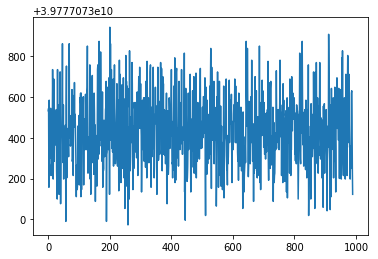

In [152]:
plt.plot(model_history.history['loss'][10:])

In [167]:
y_train_pred_2 = model_build_2.predict(X_train)
# print('MSE of training data: {}'.format(mean_squared_error(y_train, y_train_pred_2)))


#or
y_train_reshape = np.array(y_train).reshape(-1,1)
print('MSE of training data: {}'.format(mean_squared_error(y_train_reshape, y_train_pred_2)))

MSE of training data: 39750633017.2609


# Tuning Hyperparameter

In [175]:
# Function that creates our Keras model
def create_model(optimizer= 'adam' , activation= 'relu'):
    model = Sequential()
    model.add(Dense(128, input_shape=(336,), activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    
    
    
    # Create a model as a sklearn estimator
#     model = KerasClassifier(build_fn=model, epochs=6, batch_size=16, verbose = 0)
    
    return model



In [176]:
model_hyperparameter = create_model()

In [178]:
# Create a model as a sklearn estimator
model_hyperparameter = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16, verbose = 0)

In [184]:


# Define a series of parameters
params = dict(optimizer=['sgd','adam'],batch_size=[16, 32], activation=['relu','tanh', 'sigmoid', 'softmax'])

# Create a random search cv object and fit it to the data


grid_search = GridSearchCV(estimator = model_hyperparameter,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv = 10)

random_search_results = grid_search.fit(X_train, y_train, verbose=0)

# random_search = RandomizedSearchCV(model_hyperparameter, param_distributions=params, cv=5)
# random_search_results = random_search.fit(X_train, y_train, verbose=0)

AttributeError: 'KerasClassifier' object has no attribute 'loss'